In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import ast, json
%matplotlib inline

In [3]:
#read in automobile.txt
auto_mob_df = pd.read_csv('automobile.txt',delimiter = ',')
auto_mob_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


missingno.matrix(auto_mob_df,figsize =(10,10)

<AxesSubplot:>

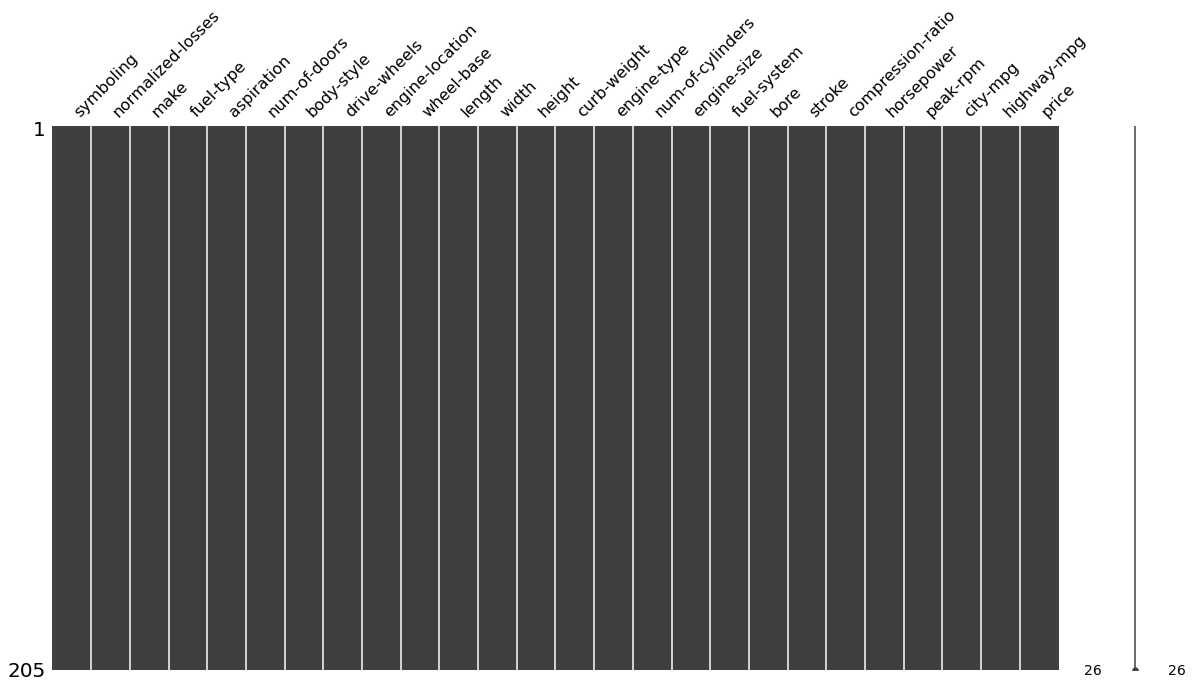

In [4]:
#display visual of missing values
missingno.matrix(auto_mob_df,figsize =(20,10))

This visual shows that there are no missing values in the dataset ,but in the first 3 row of the normalized-losses column are '?'.Need to find out the different properties of the columns.

In [5]:
#check datatypes of all columns
auto_mob_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Some of the integer values are seen as object dtypes , will have to change these to int or float to make with the numeric
data.

In [6]:
#.describe() function returns info on column values 
auto_mob_df.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


From the .describe datatable I can see that the most occuring value in the columns normalized-losses and price is the '?'. Will replace this value with nan.

In [7]:
#replaced all instances of '?' in the dataset with nan to use the .dropna function
auto_mob_df = auto_mob_df.replace('?',np.nan)

#used .dropna function to remove rows where the price and normalized-losses row value == Nan
auto_mob_df.dropna(subset = ['price'],axis=0,inplace= True)
auto_mob_df.dropna(subset = ['normalized-losses'],axis=0,inplace= True)
auto_mob_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [8]:
#drop columns with redundant data
auto_mob_df.drop('fuel-type',axis = 1, inplace = True)
auto_mob_df.drop('aspiration',axis = 1,inplace = True)
auto_mob_df.drop('num-of-doors',axis = 1,inplace = True)
auto_mob_df.drop('engine-location',axis = 1,inplace = True)
auto_mob_df.drop('wheel-base',axis = 1,inplace = True)
auto_mob_df.drop('length',axis = 1,inplace = True)
auto_mob_df.drop('width',axis = 1,inplace = True)
auto_mob_df.drop('num-of-cylinders',axis = 1,inplace = True)
auto_mob_df.drop('fuel-system',axis = 1,inplace = True)
auto_mob_df.drop('engine-type',axis = 1,inplace = True)

In [9]:
#check for and drop duplicate columns
auto_mob_df = auto_mob_df.drop_duplicates()

In [10]:
#change the dtype of price column from obj to float
auto_mob_df['price'] = auto_mob_df['price'].astype('float16')
auto_mob_df['price']

3      13952.0
4      17456.0
6      17712.0
8      23872.0
10     16432.0
        ...   
200    16848.0
201    19040.0
202    21488.0
203    22464.0
204    22624.0
Name: price, Length: 164, dtype: float16

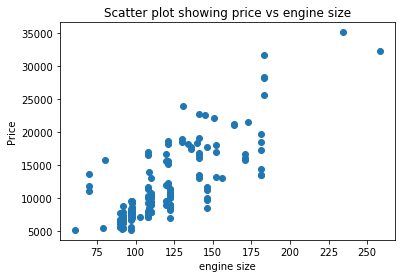

In [11]:
x = auto_mob_df['engine-size']
y = auto_mob_df['price']
# Plot
plt.scatter(x,y)
#create scatter plot with .scatter input x and y values and alpha to increases the colour of points
plt.title('Scatter plot showing price vs engine size')
#set title
plt.xlabel('engine size')
#set x label
plt.ylabel('Price')
#set y label
plt.show()
#display visual

The scatter plot above shows that as the size of the engine increases so does the price of the vehicle.

<AxesSubplot:xlabel='count', ylabel='make'>

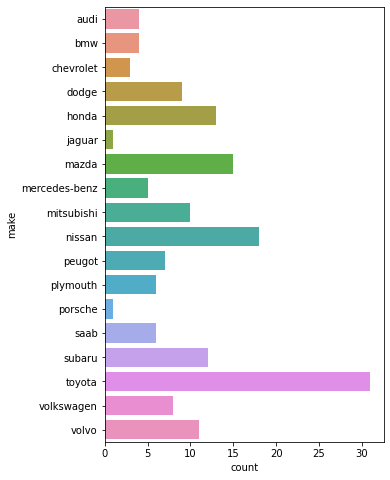

In [14]:
#plot bar graph to determine frequency of vehicles
fig = plt.figure(figsize =(5,8))
sns.countplot(y = auto_mob_df['make'],data = auto_mob_df)

The bar graph show us that the brand toyota has the highest number of vehicles in the datatable.

In [13]:
#create by_car obj to store grouped data
by_car = auto_mob_df.groupby(by = ['make'])

#store grouped data and the averages of the other column values.
car_data_avg =round(by_car.mean(),0)
car_data_avg.head()

,symboling,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
make,,,,,,,,
audi,2.0,55.0,2773.0,128.0,9.0,20.0,24.0,18240.0
bmw,0.0,54.0,2566.0,136.0,9.0,22.0,28.0,18864.0
chevrolet,1.0,52.0,1757.0,80.0,10.0,41.0,46.0,6008.0
dodge,1.0,52.0,2151.0,103.0,9.0,28.0,34.0,7876.0
honda,1.0,53.0,2097.0,99.0,9.0,30.0,35.0,8184.0


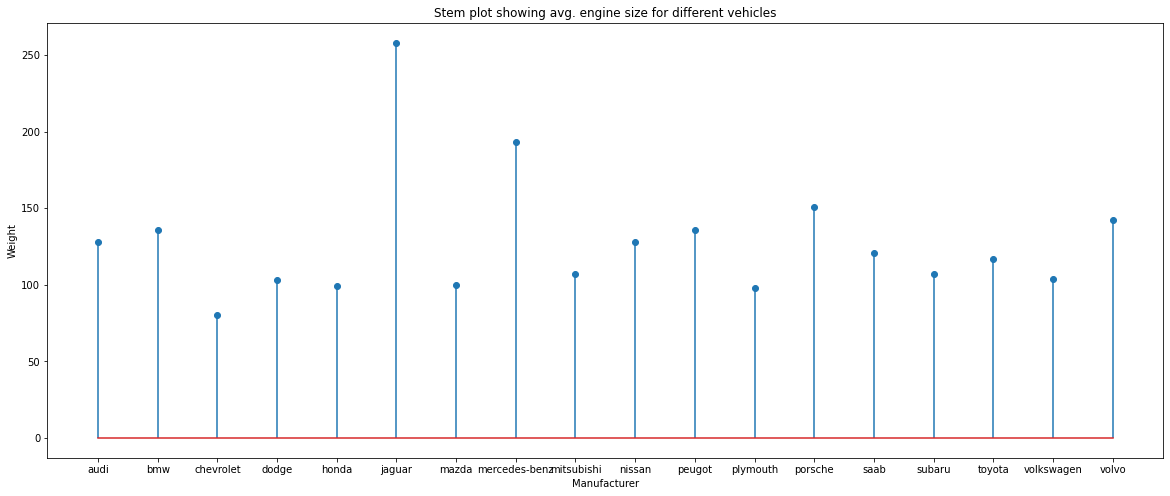

In [18]:
#stem plot visual of average engine size 
x = auto_mob_df['make'].unique()
y = car_data_avg['engine-size']
fig2 =plt.figure(figsize =(20,8)) 
plt.stem(x, y)
plt.ylabel('Weight')
plt.xlabel('Manufacturer')
plt.title('Stem plot showing avg. engine size for different vehicles')
plt.show()

The above stem plot shows that on average the jaguar has the largest engines.

In [32]:
#create obj to store selected columns from  auto_mob_df 
auto_data_group = auto_mob_df[['make','symboling','drive-wheels','body-style','price']]

#use .value_counts()
auto_data_group['drive-wheels'].value_counts()

fwd    106
rwd     50
4wd      8
Name: drive-wheels, dtype: int64

In [21]:
#store the data grouped by wheel drive 
drive_wheel_avg = auto_data_group.groupby(by = ['drive-wheels'],as_index = False).mean()
drive_wheel_avg

,drive-wheels,symboling,price
0,4wd,0.500000,10240.0
1,fwd,0.896226,8808.0
2,rwd,0.620000,17296.0


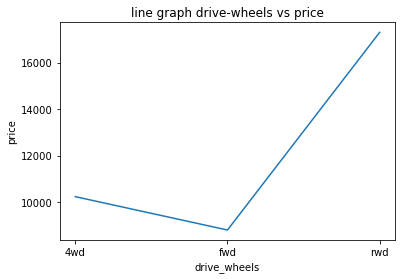

In [19]:
#plot and display drives-wheels vs price
x = drive_wheel_avg['drive-wheels']
y = drive_wheel_avg['price']

plt.plot(x,y)

plt.xlabel('drive_wheels')
plt.ylabel('price')
plt.title('line graph drive-wheels vs price')
plt.show()

This line graph shows that the price for rwd vehicles are higher then 4wd and fwd.

In [20]:
#store data grouped by body-style
body_style_avg = auto_data_group.groupby(by = ['body-style'],as_index = False).mean()
body_style_avg

,body-style,symboling,price
0,convertible,2.500000,26368.0
1,hardtop,1.600000,13144.0
2,hatchback,1.533333,9472.0
3,sedan,0.362500,12512.0
4,wagon,-0.235294,11352.0


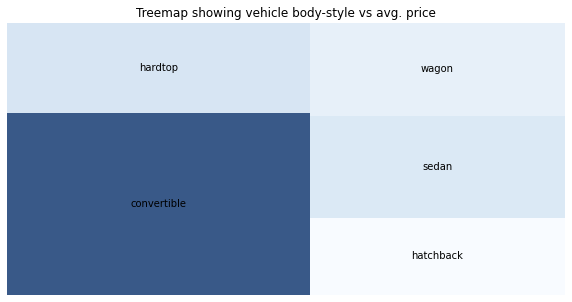

In [22]:
#plot and display treemap
import squarify
import matplotlib

#set values for sizes 
sizes=body_style_avg['price']

#set label
label=body_style_avg['body-style']

fig = plt.figure(figsize=(10,5))
#create a color pallete, mapped to these values
cmap = matplotlib.cm.Blues
mini = min(sizes)
maxi = max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]
#the above code uses a group of different obj to create a range for a specific colour based on the range of values in a dataset

squarify.plot(sizes=sizes, label = label, alpha=.8, color=colors )
#above code plots the information and assigns the colour

plt.title('Treemap showing vehicle body-style vs avg. price')
#set title

plt.axis('off')
plt.show()

The above treemap shows that the price for vehicles with a convertible car shape have a higher price then the rest .

In [24]:
group_data_avg = auto_data_group.groupby(['drive-wheels','body-style'],as_index = False).mean()
group_data_avg

,drive-wheels,body-style,symboling,price
0,4wd,hatchback,2.000000,7604.0
1,4wd,sedan,0.666667,12648.0
2,4wd,wagon,0.000000,9096.0
3,fwd,hardtop,2.000000,8248.0
4,fwd,hatchback,1.244444,7988.0
5,fwd,sedan,0.725490,9536.0
6,fwd,wagon,0.000000,8832.0
7,rwd,convertible,2.500000,26368.0
8,rwd,hardtop,1.500000,14368.0
9,rwd,hatchback,2.428571,14376.0


The above data table shows the average values for price and symboling for different combinations of drive-wheels and body-style